# Homework 1 PicoCTF

### Nicole Caicedo 00213150


### 1.- Mod 26
Cryptography can be easy, do you know what ROT13 is? cvpbPGS{arkg_gvzr_V’yy_gel_2_ebhaqf_bs_ebg13_uJdSftmh}
Hint — 1 : The flag is in the format PICOCTF{}

Solution:
a <--->n 

b <---> o

c <--->p

d <--->q

e <--->r

f <--->s

g <--->t

h <--->u

i <--->v

j <--->w

k <--->x

l <--->y

m <--->z


picoCTF{next_time_I’ll_try_2_rounds_of_rot13_hWqFsgzu}


### 2.- Easy Peasy
A one-time pad is unbreakable, but can you manage to recover the flag? (Wrap with picoCTF{}) nc mercury.picoctf.net 11188 otp.py

In [2]:
#!/usr/bin/python3 -u
import os.path

KEY_FILE = "key"
KEY_LEN = 50000
FLAG_FILE = "flag"


def startup(key_location):
	flag = open(FLAG_FILE).read()
	kf = open(KEY_FILE, "rb").read()

	start = key_location
	stop = key_location + len(flag)

	key = kf[start:stop]
	key_location = stop

	result = list(map(lambda p, k: "{:02x}".format(ord(p) ^ k), flag, key))
	print("This is the encrypted flag!\n{}\n".format("".join(result)))

	return key_location

def encrypt(key_location):
	ui = input("What data would you like to encrypt? ").rstrip()
	if len(ui) == 0 or len(ui) > KEY_LEN:
		return -1

	start = key_location
	stop = key_location + len(ui)

	kf = open(KEY_FILE, "rb").read()

	if stop >= KEY_LEN:
		stop = stop % KEY_LEN
		key = kf[start:] + kf[:stop]
	else:
		key = kf[start:stop]
	key_location = stop

	result = list(map(lambda p, k: "{:02x}".format(ord(p) ^ k), ui, key))

	print("Here ya go!\n{}\n".format("".join(result)))

	return key_location


print("******************Welcome to our OTP implementation!******************")
c = startup(0)
while c >= 0:
	c = encrypt(c)


******************Welcome to our OTP implementation!******************


FileNotFoundError: [Errno 2] No such file or directory: 'flag'

### 3.- The numbers 
The numbers... what do they mean?
The flag is in the format PICOCTF{}

a-1

b-2

c-3

d-4

e-5

f-6

g-7

h-8

i-9

k-11

l-12

m-13

n-14

o-15

p-16

q-17

r-18

s-19

t-20

u-21

v-22

w-23

x-24

y-25

z-26

16 9 3 15 3 20 6{20 8 5 14 21 13 2 5 18 19 13 1 19 15 14}
picocft{thenumbersnason}



### 4.- New Caesar
We found a brand new type of encryption, can you break the secret code? (Wrap with picoCTF{})
apbopjbobpnjpjnmnnnmnlnbamnpnononpnaaaamnlnkapndnkncamnpapncnbannaapncndnlnpna new_caesar.py


In [1]:
import string

LOWERCASE_OFFSET = ord("a")
ALPHABET = string.ascii_lowercase[:16]

def b16_encode(plain):
	enc = ""
	for c in plain:
		binary = "{0:08b}".format(ord(c))
		enc += ALPHABET[int(binary[:4], 2)]
		enc += ALPHABET[int(binary[4:], 2)]
	return enc

def shift(c, k):
	t1 = ord(c) - LOWERCASE_OFFSET
	t2 = ord(k) - LOWERCASE_OFFSET
	return ALPHABET[(t1 + t2) % len(ALPHABET)]

flag = "redacted"
key = "redacted"
assert all([k in ALPHABET for k in key])
assert len(key) == 1

b16 = b16_encode(flag)
enc = ""
for i, c in enumerate(b16):
	enc += shift(c, key[i % len(key)])
print(enc)



AssertionError: 

In [7]:
import string

LOWERCASE_OFFSET = ord("a")
ALPHABET = string.ascii_lowercase[:16]#a-p

def b16_encode(plain):
	enc = ""
	for c in plain:
		binary = "{0:08b}".format(ord(c))#01100001=97
		print(binary)
		enc += ALPHABET[int(binary[:4], 2)]#[0110]=6=g
		enc += ALPHABET[int(binary[4:], 2)]#[0001]=1=b
		print(enc)
	return enc

def shift(c, k):
	t1 = ord(c) - LOWERCASE_OFFSET
	t2 = ord(k) - LOWERCASE_OFFSET
	return ALPHABET[(t1 + t2) % len(ALPHABET)]

def b16_decode(enc):
	dec = ""
	for i in range(0, len(enc), 2):
		binary = "{0:04b}".format(ALPHABET.index(enc[i]))+"{0:04b}".format(ALPHABET.index(enc[i+1]))
		dec += chr(int(binary,2))
	return dec
	
enc="apbopjbobpnjpjnmnnnmnlnbamnpnononpnaaaamnlnkapndnkncamnpapncnbannaapncndnlnpna"
for key in ALPHABET:
	flag = ""
	print("Key: ",key)
	for c in enc:
		flag +=shift(c,key)
	print("Flag: ",b16_decode(flag))





Key:  a
ÐÒÓÛßÐùÙùÜÝÜÛÑßÞÞßÐ ÛÚÓÚÒßÒÑ
Key:  b
Flag:  /
/ ê
íîíìâàïïàáìëäëãàãâáãäìàá
Key:  c
Flag:  !001ûþÿþýó.ñððñò".ýü!õüô.ñ!ôó/ò!ôõýñò
Key:  d
?202 ?3?
Key:  e
Flag:  CR=RS=@D@C@CAC
Key:  f
Flag:  TcNcd.N!"! &Q$##$%UQ /T(/'Q$T'&R%T'( $%
Key:  g
Flag:  et_tu?_23217b54456fb10e908b5e87c6e89156
Key:  h
Flag:  v`@`CDCBHsFEEFGwsBAvJAIsFvIHtGvIJBFG
Key:  i
Flag:  qQqTUTSYWVVWXSR[RZWZYXZ[SWX
Key:  j
Flag:  §§¨befedjhgghidclckhkjikldhi
Key:  k
Flag:  ©¸¸¹svwvu{¦yxxyzª¦ut©}t|¦y©|{§z©|}uyz
Key:  l
Flag:  ºÉ¤ÉÊ¤·»·º·º¸º
Key:  m
Flag:  ËÚµÚÛµÈÌÈËÈËÉË
Key:  n
Flag:  ÜëÆëì¦Æ©ª©¨®Ù¬««¬­ÝÙ¨§Ü §¯Ù¬Ü¯®Ú­Ü¯ ¨¬­
Key:  o
Flag:  íü×üý·×º»º¹¿ê½¼¼½¾îê¹¸í±¸°ê½í°¿ë¾í°±¹½¾
Key:  p
ÈèËÌËÊÀûÎÍÍÎÏÿûÊÉþÂÉÁûÎþÁÀüÏþÁÂÊÎÏ


El unico que parece tener sentido es el de la key g :
et_tu?_23217b54456fb10e908b5e87c6e89156
ya que no tiene simbolos extranios

### 5.- 13
Cryptography can be easy, do you know what ROT13 is?

cvpbPGS{abg_gbb_onq_bs_n_ceboyrz}

a <--->n

b <---> o

c <--->p

d <--->q

e <--->r

f <--->s

g <--->t

h <--->u

i <--->v

j <--->w

k <--->x

l <--->y

m <--->z

picoCTF{not_too_bad_of_a_problem}


### 6.- Caesar
Description

Decrypt this message.

picoCTF{gvswwmrkxlivyfmgsrhnrisegl}

caesar cipher tutorial



In [18]:
alphabet="abcdefghijklmnopqrstuvwxyz"

encrypted_flag = "gvswwmrkxlivyfmgsrhnrisegl"

length_text = len(encrypted_flag)

for j in range(26):
    for i in range(length_text):
        print(chr(((ord(encrypted_flag[i])-j)-97)%26+97), end='')
    print()
        
    		
print()

gvswwmrkxlivyfmgsrhnrisegl
furvvlqjwkhuxelfrqgmqhrdfk
etquukpivjgtwdkeqpflpgqcej
dspttjohuifsvcjdpoekofpbdi
crossingtherubicondjneoach
bqnrrhmfsgdqtahbnmcimdnzbg
apmqqglerfcpszgamlbhlcmyaf
zolppfkdqeboryfzlkagkblxze
ynkooejcpdanqxeykjzfjakwyd
xmjnndiboczmpwdxjiyeizjvxc
wlimmchanbylovcwihxdhyiuwb
vkhllbgzmaxknubvhgwcgxhtva
ujgkkafylzwjmtaugfvbfwgsuz
tifjjzexkyvilsztfeuaevfrty
sheiiydwjxuhkrysedtzdueqsx
rgdhhxcviwtgjqxrdcsyctdprw
qfcggwbuhvsfipwqcbrxbscoqv
pebffvatgurehovpbaqwarbnpu
odaeeuzsftqdgnuoazpvzqamot
nczddtyrespcfmtnzyouypzlns
mbyccsxqdrobelsmyxntxoykmr
laxbbrwpcqnadkrlxwmswnxjlq
kzwaaqvobpmzcjqkwvlrvmwikp
jyvzzpunaolybipjvukqulvhjo
ixuyyotmznkxahoiutjptkugin
hwtxxnslymjwzgnhtsiosjtfhm



only one that makes sense: crossingtherubicondjneoach

### 7.- Easy1
Description

The one time pad can be cryptographically secure, but not when you know the key. Can you solve this? We've given you the encrypted flag, key, and a table to help UFJKXQZQUNB with the key of SOLVECRYPTO. Can you use this table to solve it?

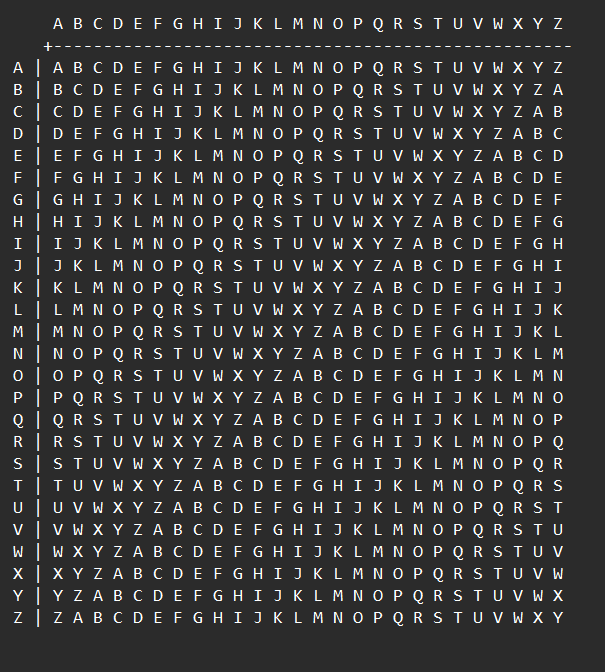

    A B C D E F G H I J K L M N O P Q R S T U V W X Y Z 
   +----------------------------------------------------
A | A B C D E F G H I J K L M N O P Q R S T U V W X Y Z
B | B C D E F G H I J K L M N O P Q R S T U V W X Y Z A
C | C D E F G H I J K L M N O P Q R S T U V W X Y Z A B
D | D E F G H I J K L M N O P Q R S T U V W X Y Z A B C
E | E F G H I J K L M N O P Q R S T U V W X Y Z A B C D
F | F G H I J K L M N O P Q R S T U V W X Y Z A B C D E
G | G H I J K L M N O P Q R S T U V W X Y Z A B C D E F
H | H I J K L M N O P Q R S T U V W X Y Z A B C D E F G
I | I J K L M N O P Q R S T U V W X Y Z A B C D E F G H
J | J K L M N O P Q R S T U V W X Y Z A B C D E F G H I
K | K L M N O P Q R S T U V W X Y Z A B C D E F G H I J
L | L M N O P Q R S T U V W X Y Z A B C D E F G H I J K
M | M N O P Q R S T U V W X Y Z A B C D E F G H I J K L
N | N O P Q R S T U V W X Y Z A B C D E F G H I J K L M
O | O P Q R S T U V W X Y Z A B C D E F G H I J K L M N
P | P Q R S T U V W X Y Z A B C D E F G H I J K L M N O
Q | Q R S T U V W X Y Z A B C D E F G H I J K L M N O P
R | R S T U V W X Y Z A B C D E F G H I J K L M N O P Q
S | S T U V W X Y Z A B C D E F G H I J K L M N O P Q R
T | T U V W X Y Z A B C D E F G H I J K L M N O P Q R S
U | U V W X Y Z A B C D E F G H I J K L M N O P Q R S T
V | V W X Y Z A B C D E F G H I J K L M N O P Q R S T U
W | W X Y Z A B C D E F G H I J K L M N O P Q R S T U V
X | X Y Z A B C D E F G H I J K L M N O P Q R S T U V W
Y | Y Z A B C D E F G H I J K L M N O P Q R S T U V W X
Z | Z A B C D E F G H I J K L M N O P Q R S T U V W X Y

Submit your answer in our flag format. For example, if your answer was 'hello', you would submit 'picoCTF{HELLO}' as the flag.

Please use all caps for the message




Combinacion por ejes como punto cardinal

picoCTF{MTU...} parece no tener sentido

Ver la key y buscar que letra me da la letra de la flag

picoCTF{CRYPTOISFUN}

### 8.- Spelling-quiz
Description

I found the flag, but my brother wrote a program to encrypt all his text files. He has a spelling quiz study guide too, but I don't know if that helps.

brcfxba_vfr_mid_hosbrm_iprc_exa_hoav_vwcrm



In [1]:
import random
import os

files = [
    os.path.join(path, file)
    for path, dirs, files in os.walk('.')
    for file in files
    if file.split('.')[-1] == 'txt'
]

alphabet = list('abcdefghijklmnopqrstuvwxyz')
random.shuffle(shuffled := alphabet[:])
dictionary = dict(zip(alphabet, shuffled))

for filename in files:
    text = open(filename, 'r').read()
    encrypted = ''.join([
        dictionary[c]
        if c in dictionary else c
        for c in text
    ])
    open(filename, 'w').write(encrypted)
    

Monoalphabetic 

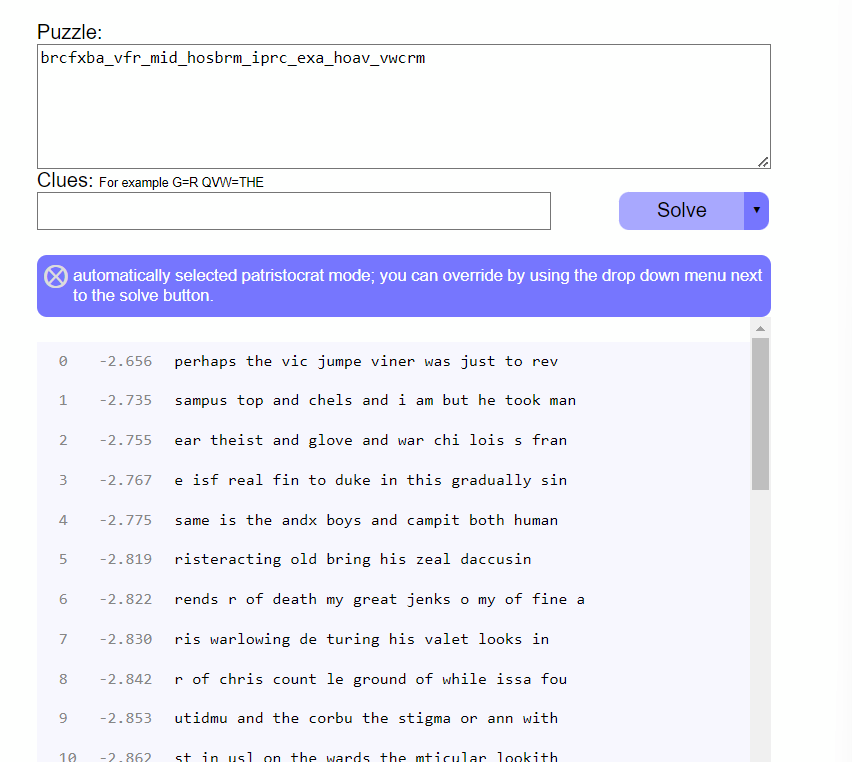
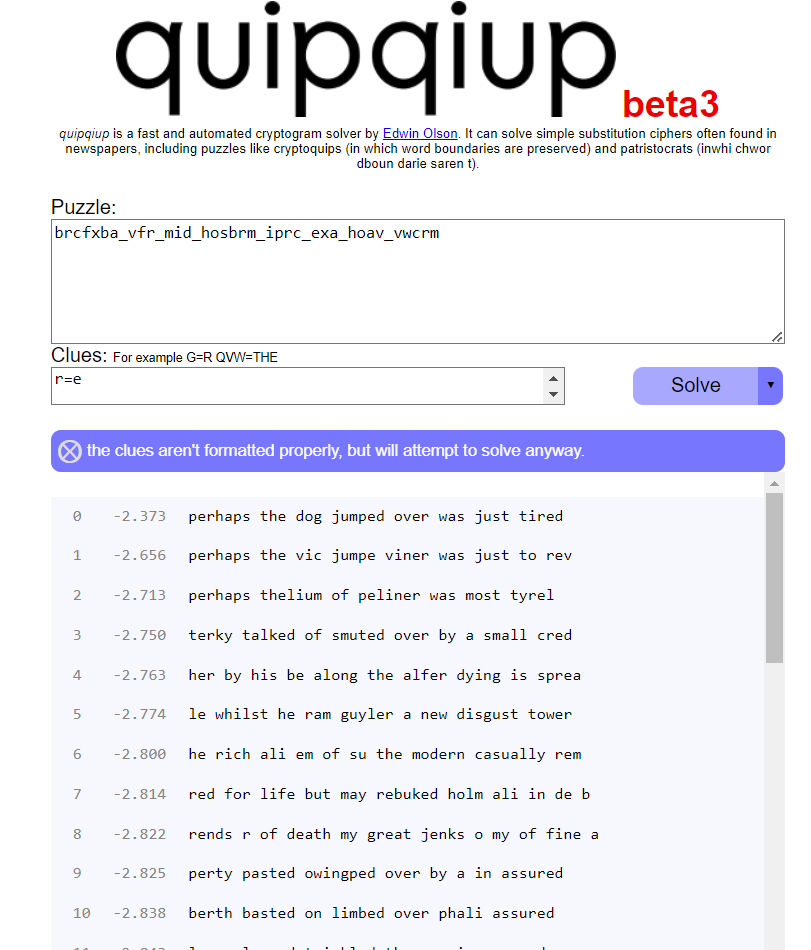
